比赛页面：https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [132]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
print(train.info())
print('-'*40)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [133]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [134]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

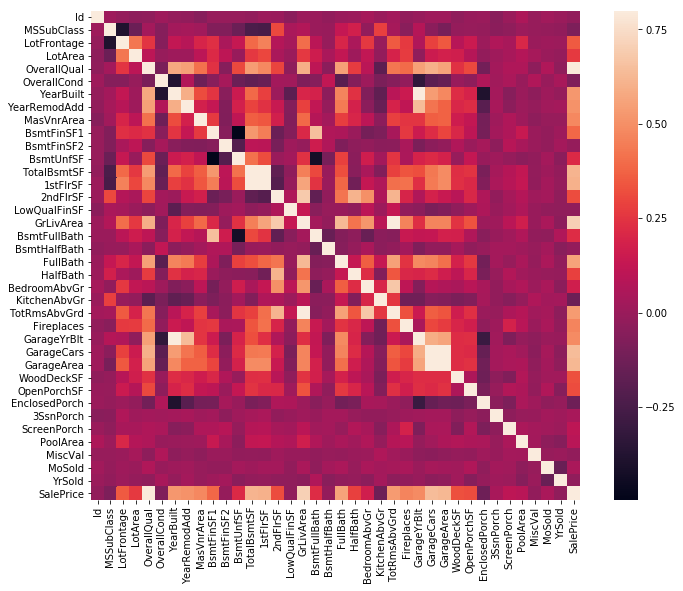

In [135]:
corrmat = train.corr()
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [136]:
cols = corrmat.nlargest(10,'SalePrice')['SalePrice'].index
print(cols)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')


[[1.         0.7909816  0.70862448 0.6404092  0.62343144 0.61358055
  0.60585218 0.56066376 0.53372316 0.52289733]
 [0.7909816  1.         0.59300743 0.60067072 0.56202176 0.5378085
  0.47622383 0.55059971 0.42745234 0.57232277]
 [0.70862448 0.59300743 1.         0.46724742 0.46899748 0.4548682
  0.56602397 0.63001165 0.82548937 0.19900971]
 [0.6404092  0.60067072 0.46724742 1.         0.88247541 0.43458483
  0.43931681 0.46967204 0.36228857 0.53785009]
 [0.62343144 0.56202176 0.46899748 0.88247541 1.         0.48666546
  0.48978165 0.40565621 0.33782212 0.47895382]
 [0.61358055 0.5378085  0.4548682  0.43458483 0.48666546 1.
  0.81952998 0.32372241 0.28557256 0.391452  ]
 [0.60585218 0.47622383 0.56602397 0.43931681 0.48978165 0.81952998
  1.         0.38063749 0.40951598 0.28198586]
 [0.56066376 0.55059971 0.63001165 0.46967204 0.40565621 0.32372241
  0.38063749 1.         0.55478425 0.46827079]
 [0.53372316 0.42745234 0.82548937 0.36228857 0.33782212 0.28557256
  0.40951598 0.5547842

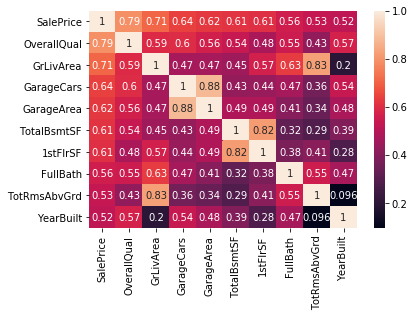

In [137]:
# 注意数据需要转置
cm = np.corrcoef(train[cols].values.T)
print(cm)
sns.heatmap(cm,cbar=True,annot=True,yticklabels=cols.values, xticklabels=cols.values)



通过上面的结果可以知道“SalePrice”没有无效或者其他非数值的数据，下面通过图示化来进一步展示“SalePrice”


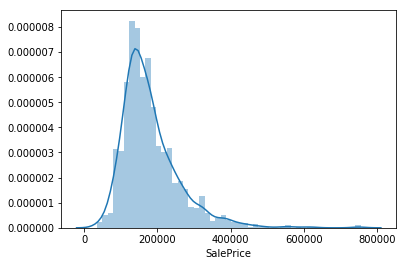

In [138]:
sns.distplot(train['SalePrice'])

In [139]:
print("偏度： %f " % train['SalePrice'].skew())
print("斜度： %f"  % train['SalePrice'].kurt())

偏度： 1.882876 
斜度： 6.536282


由上图可以知道房价呈现正态分布。下面还可以看到两个统计学中的概念： 峰度（Kurtosis）和 偏度（Skewness）。

    峰度：峰度（Kurtosis）是描述某变量所有取值分布形态陡缓程度的统计量。

    它是和正态分布相比较的。

        Kurtosis=0 与正态分布的陡缓程度相同。

        Kurtosis>0 比正态分布的高峰更加陡峭——尖顶峰

        Kurtosis<0 比正态分布的高峰来得平台——平顶峰计算公式：β = M_4 /σ^4 偏度：

    偏度：偏度（Skewness）是描述某变量取值分布对称性的统计量。

        Skewness=0 分布形态与正态分布偏度相同
        Skewness>0 正偏差数值较大，为正偏或右偏。长尾巴拖在右边。
        Skewness<0 负偏差数值较大，为负偏或左偏。长尾巴拖在左边。 计算公式： S= (X^ - M_0)/δ Skewness 越大，分布形态偏移程度越大。


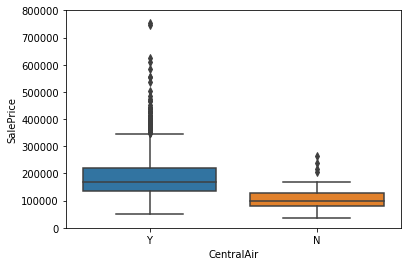

In [140]:
# CentralAir
var = 'CentralAir'
fig = sns.boxplot(x=var, y="SalePrice", data=train)
fig.axis(ymin=0, ymax=800000);

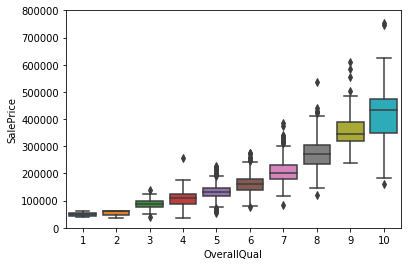

In [141]:
var = 'OverallQual'
fig = sns.boxplot(x=var, y="SalePrice", data=train)
fig.axis(ymin=0, ymax=800000);

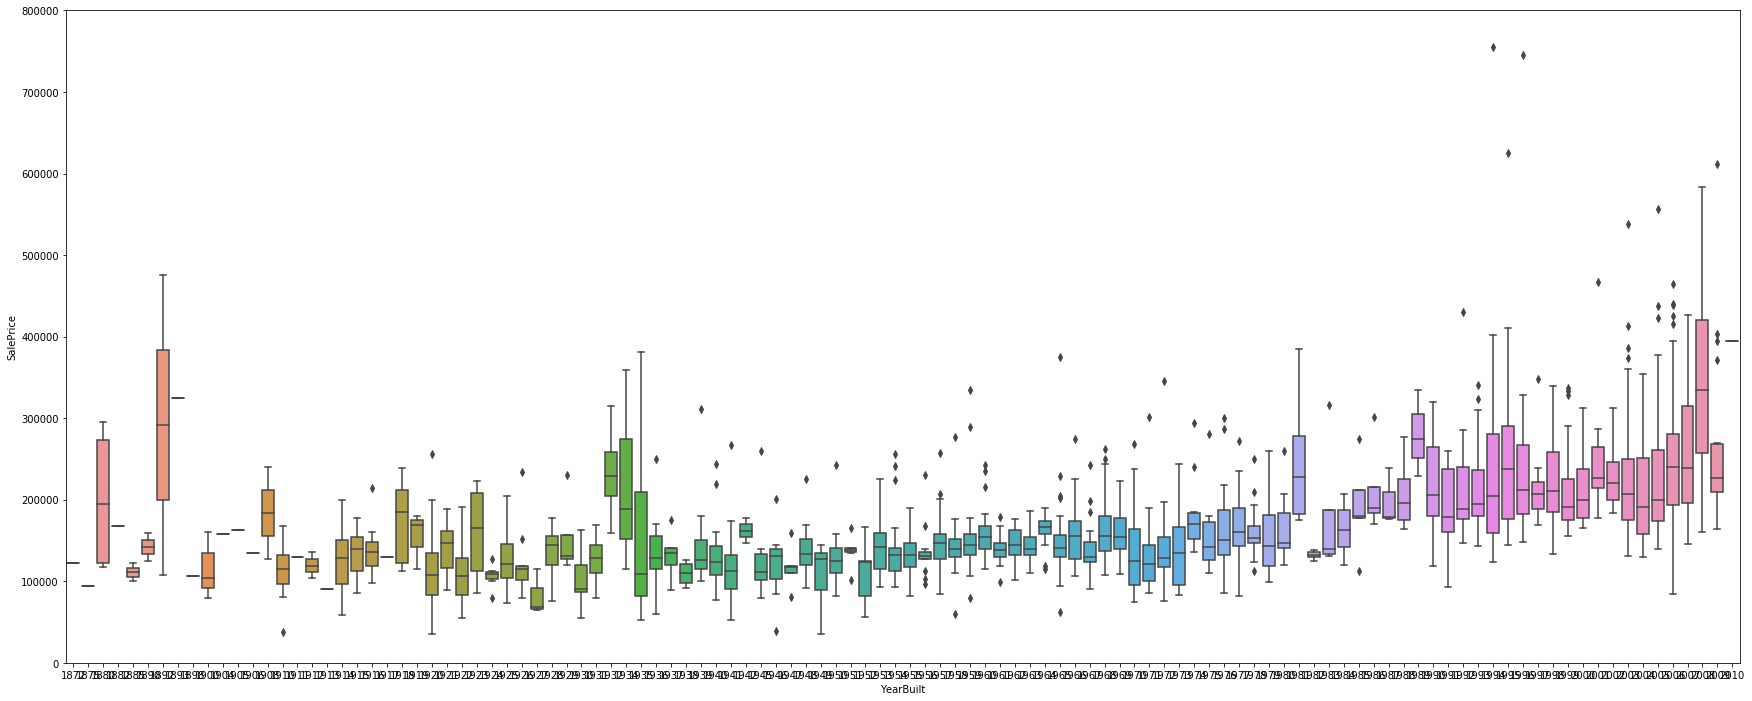

In [142]:
# YearBuilt boxplot
var = 'YearBuilt'
f, ax = plt.subplots(figsize=(30, 12))
fig = sns.boxplot(x=var, y="SalePrice", data=train)
fig.axis(ymin=0, ymax=800000);

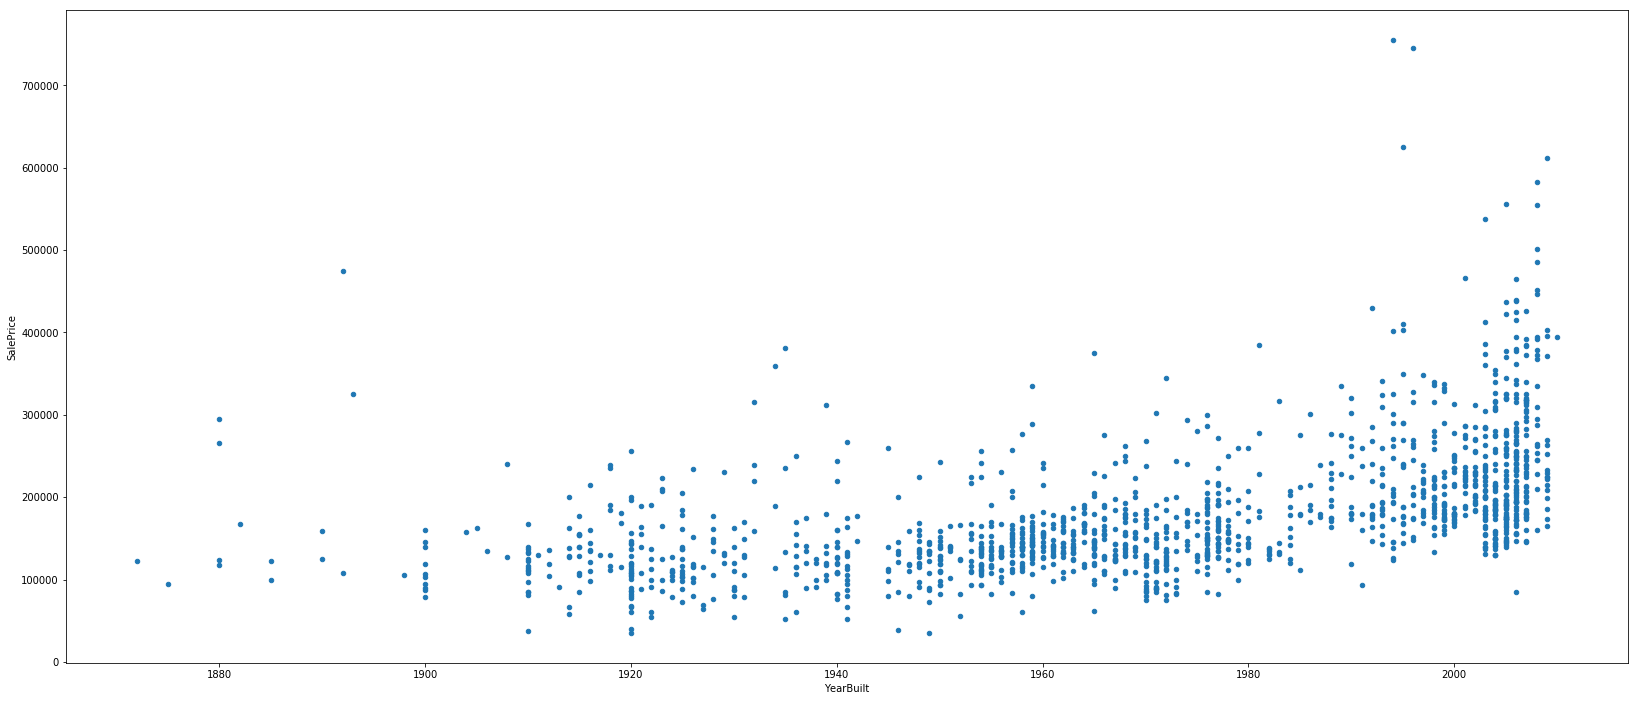

In [143]:
var = 'YearBuilt'
fig, ax = plt.subplots(figsize=(28, 12))
train.plot.scatter(x=var, y="SalePrice", ax=ax)

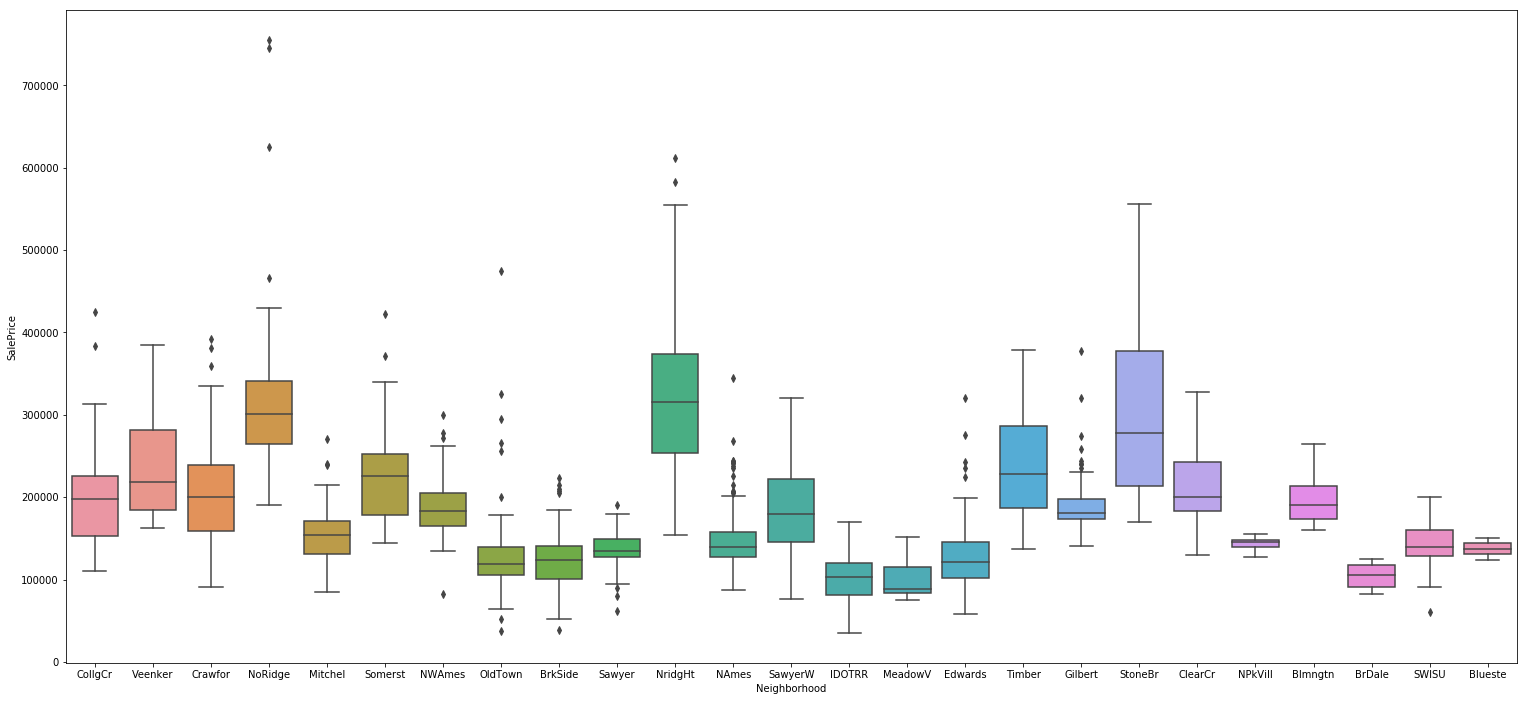

In [144]:
# Neighborhood
var = 'Neighborhood'
f, ax = plt.subplots(figsize=(26, 12))
fig = sns.boxplot(x=var, y="SalePrice", data=train)

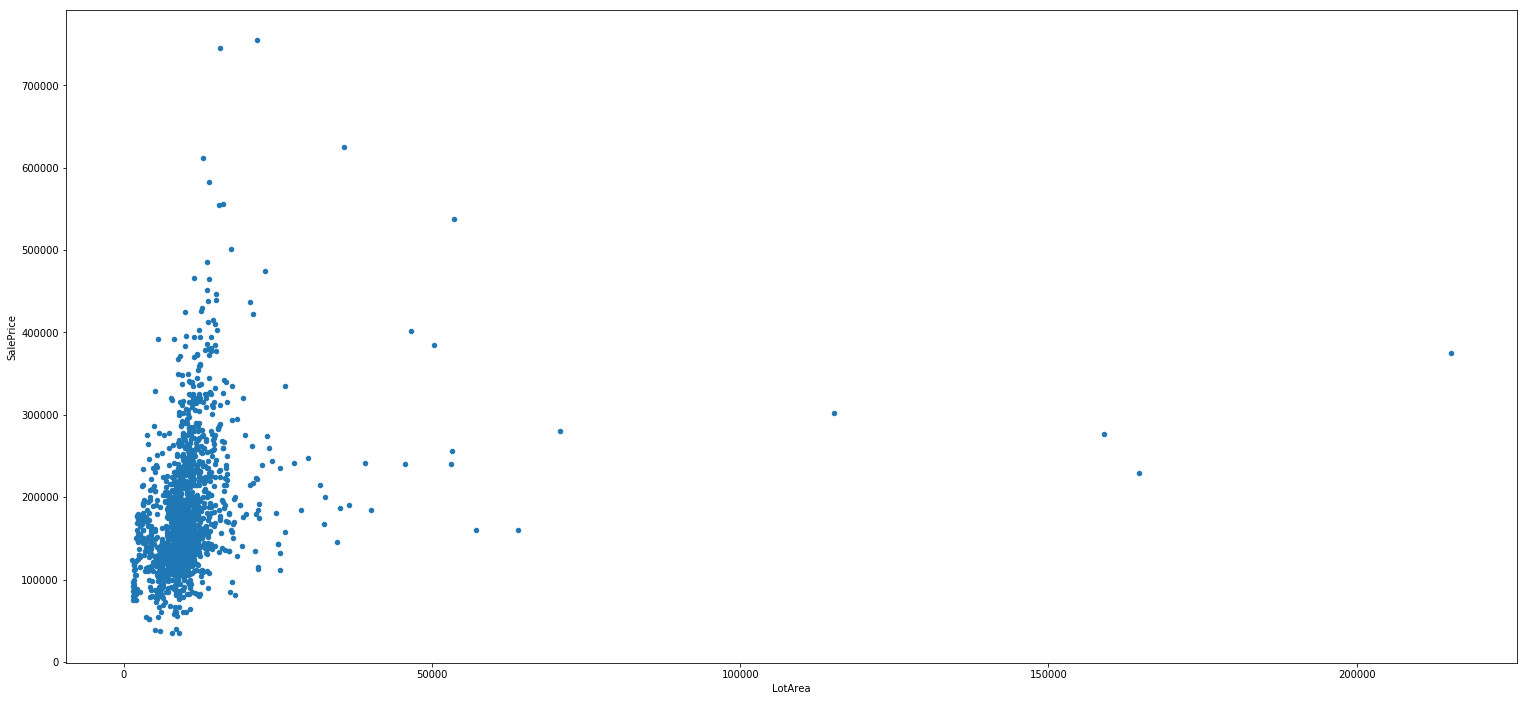

In [145]:
var  = 'LotArea'
fig, ax = plt.subplots(figsize=(26, 12))
train.plot.scatter(x=var, y='SalePrice',ax=ax)

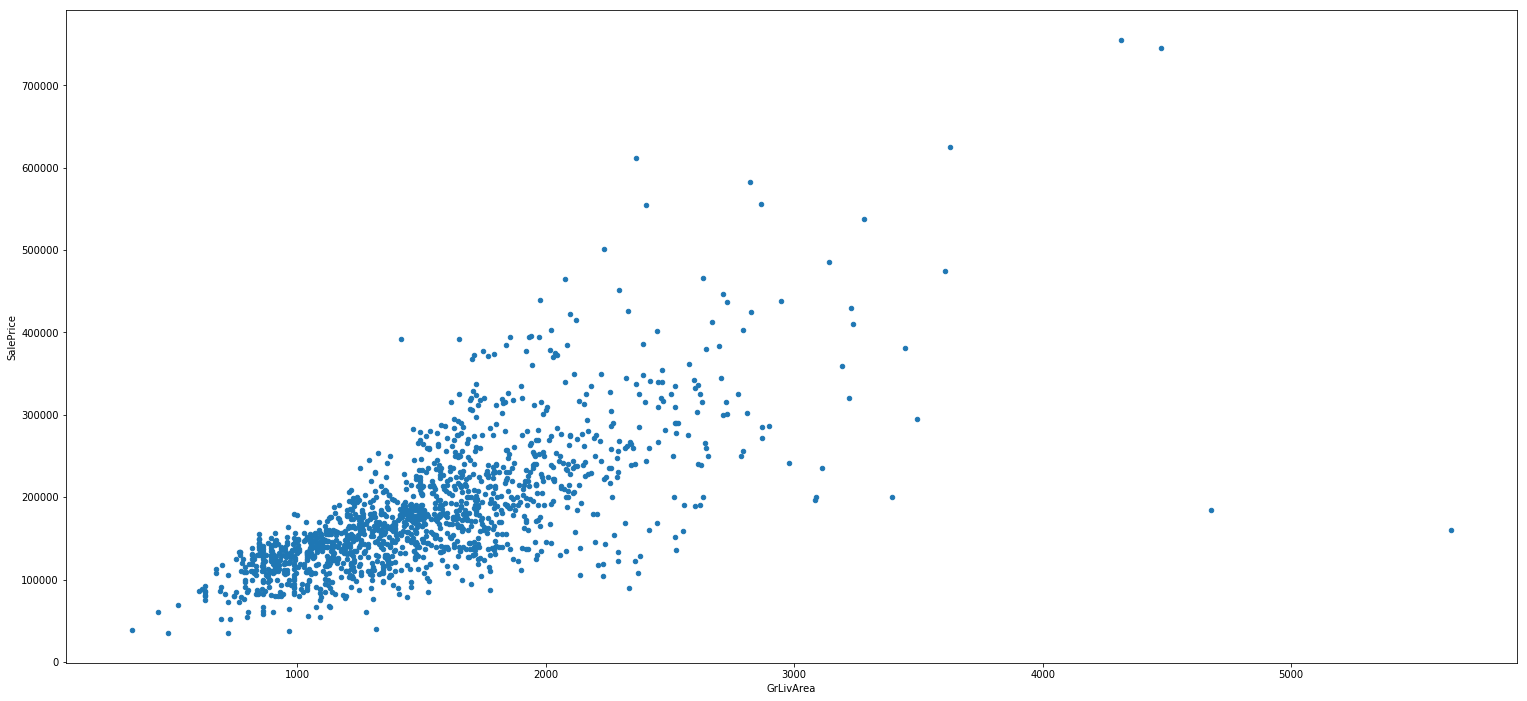

In [146]:
var  = 'GrLivArea'
fig, ax = plt.subplots(figsize=(26, 12))
train.plot.scatter(x=var, y='SalePrice',ax=ax)

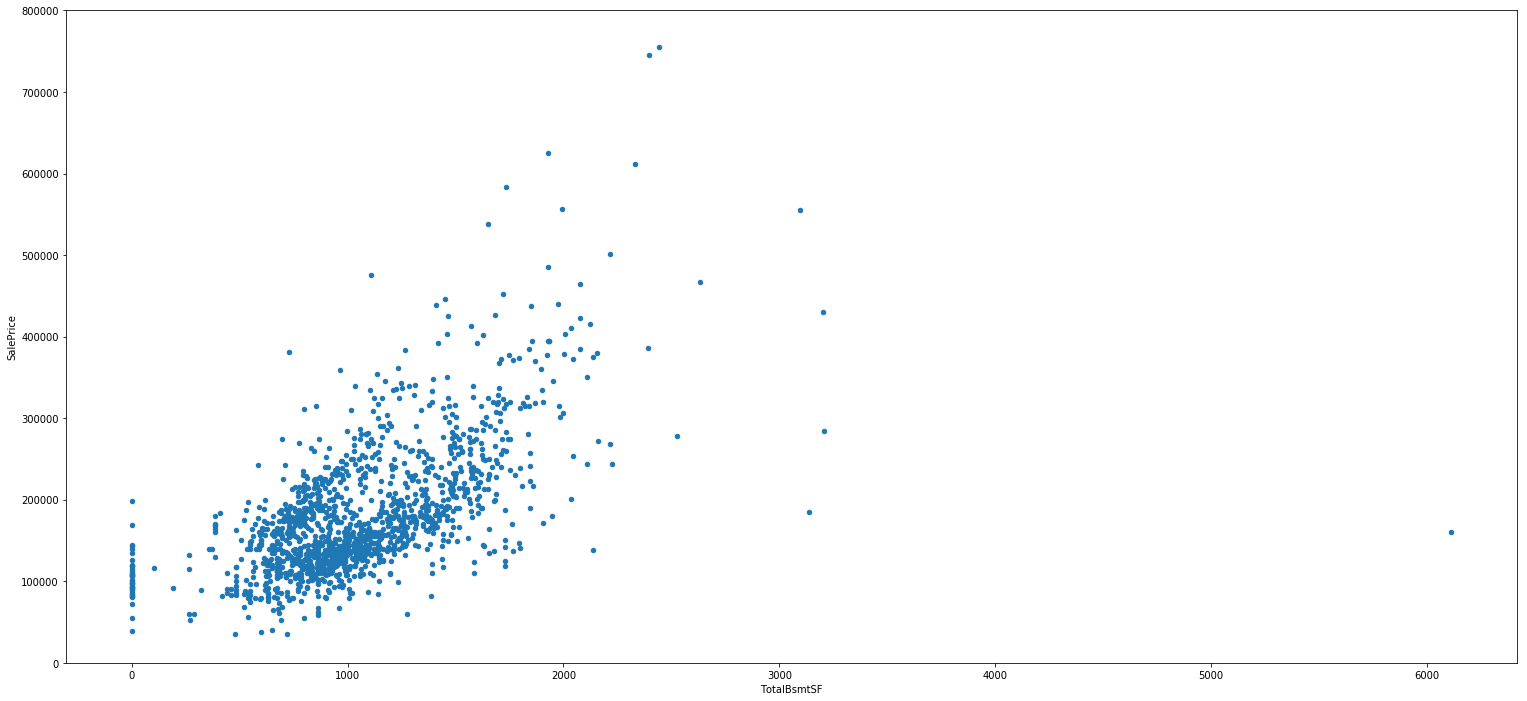

In [147]:
var  = 'TotalBsmtSF'
fig, ax = plt.subplots(figsize=(26, 12))
train.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000),ax=ax)

In [148]:
var  = ['GarageArea', 'GarageCars']
for index in range(2):
    train.plot.scatter(x=var[index], y='SalePrice', ylim=(0, 800000),ax=ax)

| Variable | Comments |
| ------ | ------ |
|GrLivArea |	生活面积|
|TotalBsmtSF |	地下室总面积|
|GarageArea/GarageCars| 车库|
|YearBuilt 	|建造年份|
|CentralAir |	中央空调|
|OverallQual | 总体评价|
|Neighborhood 	|	地段|

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


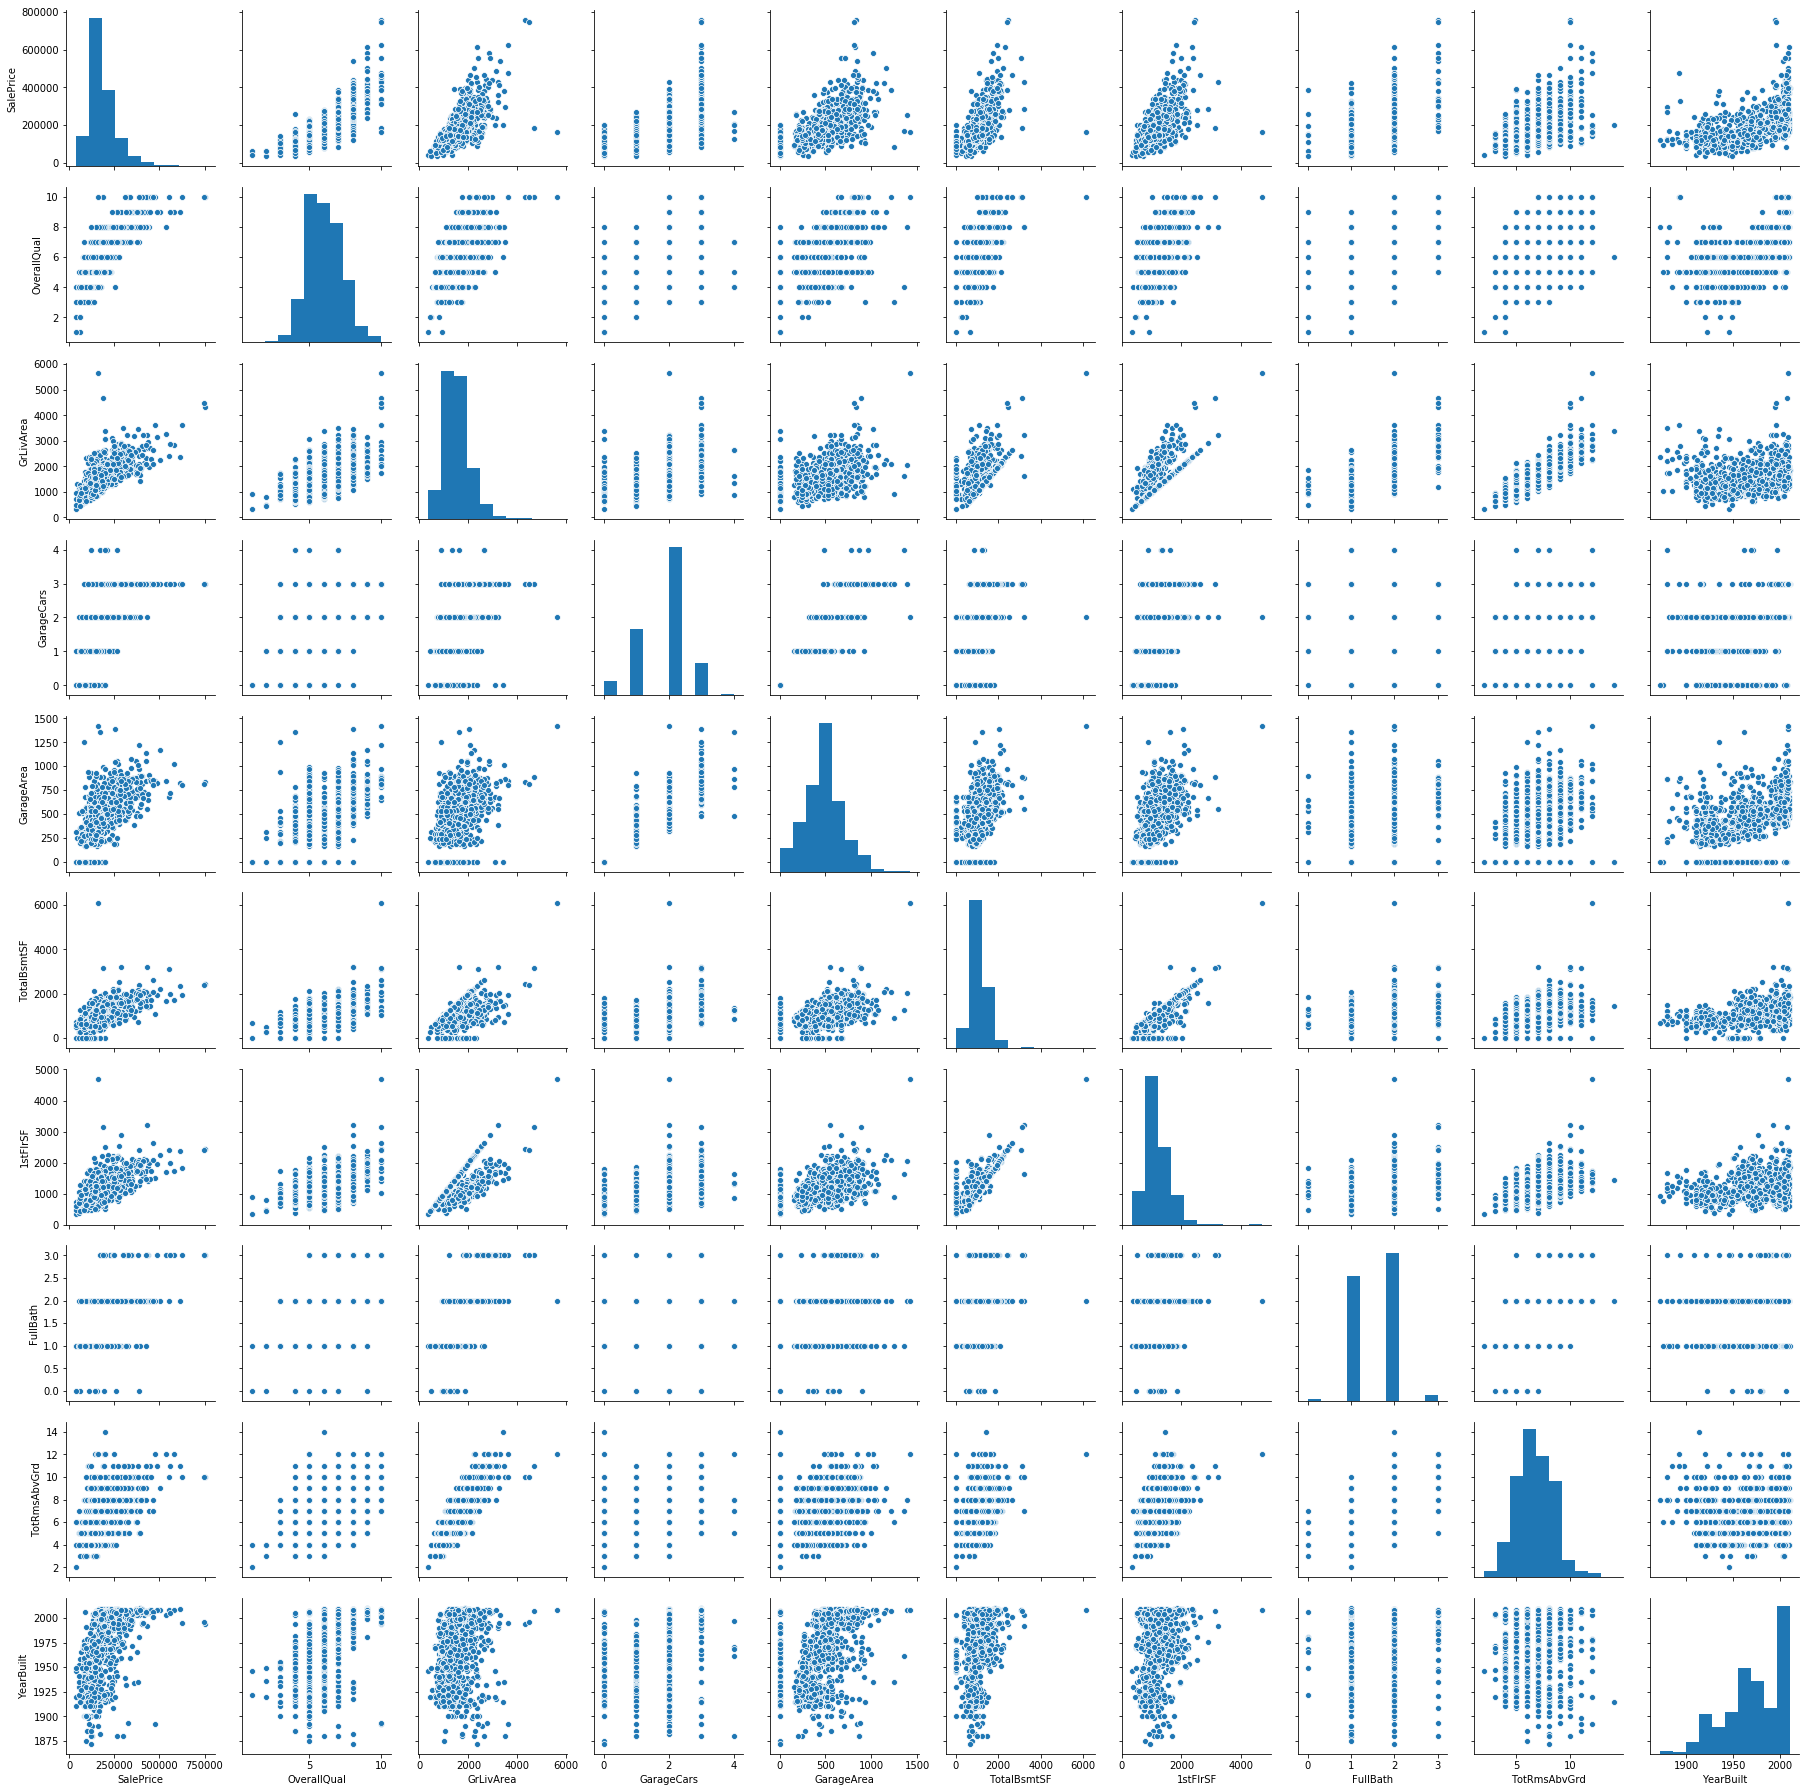

In [149]:
# 绘制关系点图
sns.pairplot(train[cols],size=2.5)

## 开始模拟数据

In [150]:
cols = cols.drop('SalePrice')
print(cols)
X=train[cols]
y=train['SalePrice']

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')


In [151]:
from sklearn import preprocessing
from sklearn import linear_model, svm, gaussian_process
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

In [152]:
X_st = preprocessing.StandardScaler().fit(X)
X_scaled = X_st.transform(X)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [153]:
X_train,X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.33,random_state=42)

In [154]:
clfs = {
        'svm':svm.SVR(), 
        'RandomForestRegressor':RandomForestRegressor(n_estimators=400),
        'BayesianRidge':linear_model.BayesianRidge()
       }
for clf in clfs:
    try:
        clfs[clf].fit(X_train, y_train)
        y_pred = clfs[clf].predict(X_test)
        print(clf + " cost:" + str(np.sum(y_pred-y_test)/len(y_pred)) )
    except Exception as e:
        print(clf + " Error:")
        print(str(e))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


svm cost:-15732.328796548636
RandomForestRegressor cost:-487.7428074614695
BayesianRidge cost:-2918.0333737123433




由上面结果选择随机森林回归算法，为了更直观地观察训练结果，我将显示一下未归一化数据的预测效果。


In [155]:
test[cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 9 columns):
OverallQual     1459 non-null int64
GrLivArea       1459 non-null int64
GarageCars      1458 non-null float64
GarageArea      1458 non-null float64
TotalBsmtSF     1458 non-null float64
1stFlrSF        1459 non-null int64
FullBath        1459 non-null int64
TotRmsAbvGrd    1459 non-null int64
YearBuilt       1459 non-null int64
dtypes: float64(3), int64(6)
memory usage: 102.7 KB


In [160]:
#test.loc[test['GarageCars'].isnull(),'GarageCars'] = test['GarageCars'].mode()[0]
#test.loc[test['GarageArea'].isnull(),'GarageArea'] = test['GarageArea'].mode()[0]
#test.loc[test['TotalBsmtSF'].isnull(),'TotalBsmtSF'] = test['TotalBsmtSF'].mode()[0]
test['GarageCars'].fillna = test['GarageCars'].mode()[0]
test['GarageArea'].fillna = test['GarageArea'].mode()[0]
test['TotalBsmtSF'].fillna = test['TotalBsmtSF'].mode()[0]
test.iloc[1116]['GarageCars']

2.0

In [163]:
clf = RandomForestRegressor(n_estimators=400)
clf.fit(X_scaled, y)
test_X = test[cols]
test_X = X_st.transform(test_X)
y_pred = clf.predict(test_X)
print(y_pred)

[127058.4175     150899.5        166845.0975     ... 137237.8375
 106367.26785714 234425.9975    ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [167]:
out_prediction = pd.DataFrame(y_pred, columns=['SalePrice'])
result = pd.concat([test['Id'], out_prediction], axis=1)

In [168]:
result.to_csv('rf_submission.csv',index=False)